In [ ]:
import json
import matplotlib.pyplot as plt
import networkx as nx

with open("../3. Feed Scraped Data/sri_lanka_safaris_with_features.json", "r", encoding="utf-8") as f:
    tours = json.load(f)

In [35]:
# === Parse Tours with Cleaned Data ===
def safe_float(val):
    try:
        return float(val)
    except (ValueError, TypeError):
        return 0.0

def preprocess_tours(tours):
    cleaned = []
    for tour in tours[0:10]:
        cleaned.append({
            "title": tour["title"],
            "category": tour["extracted_features"].get("primary_wildlife_focus", "General"),
            "duration": tour.get("travel_duration", "Unknown"),
            "popularity": safe_float(tour.get("rating", "0")),
            "location": tour["extracted_features"]["park_names"][0] if tour["extracted_features"].get("park_names") else "Unknown"
        })
    return cleaned

cleaned_tours = preprocess_tours(tours)

Group by Category or Difficulty

In [36]:
from collections import defaultdict

# Group by wildlife category
grouped = defaultdict(list)
for tour in cleaned_tours:
    grouped[tour["category"]].append(tour)

# Sort within group by popularity
for cat in grouped:
    grouped[cat] = sorted(grouped[cat], key=lambda x: x["popularity"], reverse=True)


In [37]:
preferred_order = ["Elephants", "Leopards", "Birds", "General"]
roadmap = []

for category in preferred_order:
    roadmap.extend(grouped.get(category, []))  # Add sorted tours in this order


Visualize Roadmap

C:\Users\thara\AppData\Local\Temp\ipykernel_14796\1789081384.py:19: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


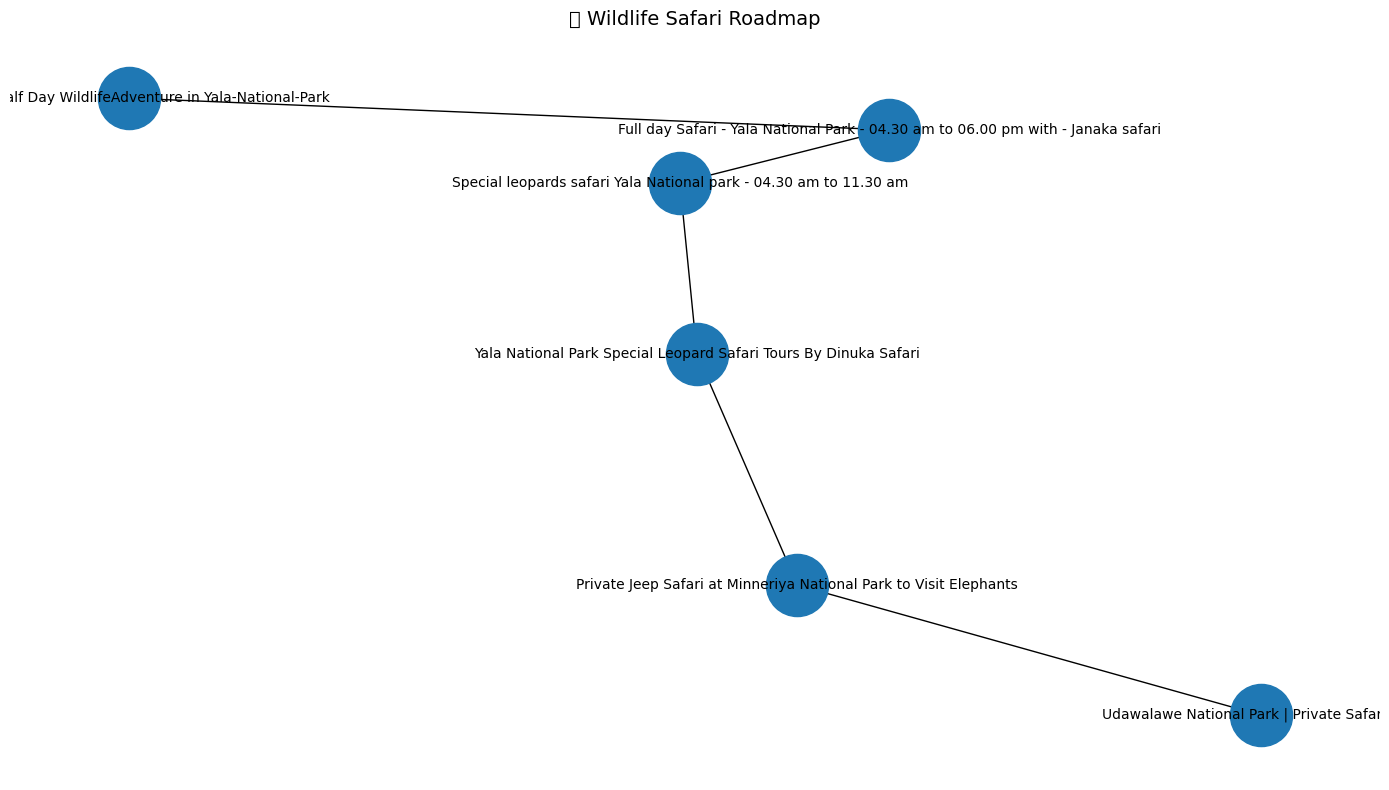

In [38]:
def visualize_roadmap(roadmap):
    if not roadmap:
        print("No roadmap data to show.")
        return
    
    G = nx.DiGraph()
    titles = [item['title'] for item in roadmap]
    edges = [(titles[i], titles[i+1]) for i in range(len(titles)-1)]
    G.add_edges_from(edges)

    pos = nx.spring_layout(G, k=0.5, seed=42)  # fix layout seed
    plt.figure(figsize=(14, 8))
    nx.draw_networkx_nodes(G, pos, node_size=2000)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    
    plt.title("🗺️ Wildlife Safari Roadmap", fontsize=14)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_roadmap(roadmap)
